In [1]:
# don't need to load extension everyf   time. 
%load_ext autoreload 

# This needs to be executed everytime.  
%autoreload 2


In [2]:
import os
import sys

# 현재 작업 디렉토리 가져오기
current_directory = os.getcwd()

# fmt: off
module_directory = os.path.join(
    current_directory, "..","thirdparty", "automatic")
if module_directory not in sys.path:
    sys.path.append(module_directory)

sys.path.append(os.path.join(current_directory, ".."))

In [3]:
import logging
from automatic.utils import *
Logger.init(LOGGER_AUTOMATIC, logging.DEBUG)
Logger.init("G2B", logging.DEBUG)

In [4]:
import automatic.selenium as s
# drv = s.create_driver()

from utils import edge
drv = edge.create_driver(headless=True, profile="markets")



Using profile: C:\Users\jaeyo\.iaa\edge\markets


In [ ]:
# This needs to be executed everytime.  
%autoreload 2

import account
pw=account.account_get("g2b", "pw")
id=account.account_get("g2b", "id")
# 공동인증서(기업)
public_cert = account.account_get("g2b", "public_cert")
# 금융인증서서
financial_cert = account.account_get("g2b", "financial_cert")

In [10]:
drv.execute_script("document.body.style.zoom='70%'")

In [6]:
# Get the current window size using the driver
window_size = drv.get_window_size()
print(f"Current window size: Width = {window_size['width']}, Height = {window_size['height']}")

Current window size: Width = 1400, Height = 800


In [9]:
drv.maximize_window()

In [16]:
new_width = window_size['width'] + 100
drv.set_window_size(new_width, window_size['height'])
print(f"New window size: Width = {new_width}, Height = {window_size['height']}")

New window size: Width = 1144, Height = 788


In [ ]:
drv.execute_script("""
    let meta = document.createElement('meta');
    meta.name = 'viewport';
    meta.content = 'width=1500, initial-scale=0.7';
    docu`ment.getElementsByTagName('head')[0].appendChild(meta);
""")

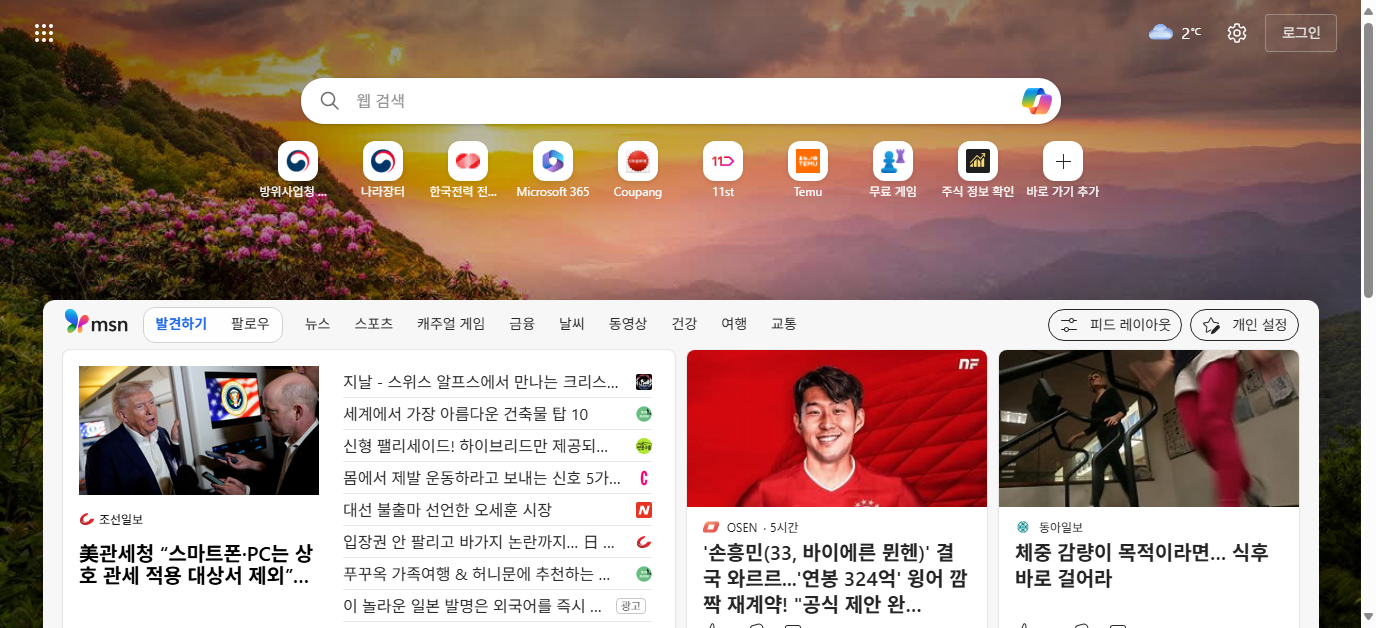

In [7]:
from IPython.display import Image, display
import time

# 화면 캡처 파일 저장 경로
screenshot_path = "screenshot.png"

# Selenium을 사용하여 화면 캡처
drv.save_screenshot(screenshot_path)

# Jupyter Notebook에 이미지 표시
display(Image(filename=screenshot_path))

In [8]:
# This needs to be executed everytime.  
%autoreload 2
from automatic.common.exceptions import ElementNotFoundException
from org.g2b.g2b_new_gen import G2B_new_gen

g2b = G2B_new_gen(drv, pw, id, public_cert, financial_cert)
try:
    g2b.login()
except ElementNotFoundException as e:
    e.context.capture("g2b_login_problem")


2025-04-13 00:38:26,764 - G2B - INFO - 로그인
2025-04-13 00:38:26,766 - G2B - INFO - 홈페이지로 이동
2025-04-13 00:38:26,767 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-04-13 00:38:33,889 - G2B - INFO - 팝업닫기
2025-04-13 00:38:33,889 - Automatic - DEBUG - exist on 팝업닫기. path=//input[@title='오늘 하루 이 창을 열지 않음']
2025-04-13 00:38:56,089 - Automatic - DEBUG - ERROR: Failed to get elements.<class 'selenium.common.exceptions.TimeoutException'> Message: 

2025-04-13 00:38:56,090 - G2B - INFO - 로그인
2025-04-13 00:38:56,091 - Automatic - DEBUG - exist on 로그아웃버튼. path=//span[text()='로그아웃']/../a
2025-04-13 00:39:06,460 - Automatic - DEBUG - clicks on 로그인버튼. path=mf_wfm_gnb_wfm_gnbTop_btnLogin
2025-04-13 00:39:07,517 - Automatic - DEBUG - click on 아이디/암호 탭. path=//a[text()='아이디/비밀번호']
2025-04-13 00:39:08,807 - Automatic - DEBUG - type on 아이디입력상자. path=mf_wfm_container_tabLgn_contents_content4_body_ibxLgnId
2025-04-13 00:39:09,006 - Automatic - DEBUG - type on 암호입력상자. path=mf_wfm_contai

In [10]:

foo = s.Xpath("테스트", "//nobr[text()='4810171401']", timeout=1, clickable=False, visible=False)
g2b.exist(foo)

2025-03-31 22:03:32,954 - Automatic - DEBUG - exist on 테스트. path=//nobr[text()='4810171401']
DEBUG:Automatic:exist on 테스트. path=//nobr[text()='4810171401']
2025-03-31 22:03:34,456 - Automatic - DEBUG - ERROR: Failed to get elements.<class 'selenium.common.exceptions.TimeoutException'> Message: 

DEBUG:Automatic:ERROR: Failed to get elements.<class 'selenium.common.exceptions.TimeoutException'> Message: 

2025-03-31 22:03:34,459 - Automatic - DEBUG - Failed to find an element
DEBUG:Automatic:Failed to find an element


False

In [7]:
code="4810171401"
g2b.register(code)

2025-03-31 21:58:04,778 - G2B - INFO - 사전등록: ['4810171401']
2025-03-31 21:58:04,781 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
DEBUG:Automatic:go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-03-31 21:58:06,157 - Automatic - DEBUG - click on 이용자관리 버튼. path=//a[contains(@class, 'btn') and span[text()='이용자관리']]
DEBUG:Automatic:click on 이용자관리 버튼. path=//a[contains(@class, 'btn') and span[text()='이용자관리']]
2025-03-31 21:58:10,878 - Automatic - DEBUG - click on 자기정보확인관리 버튼. path=//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]
DEBUG:Automatic:click on 자기정보확인관리 버튼. path=//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]
2025-03-31 21:58:16,496 - Automatic - DEBUG - click on 공급물품 버튼. path=//a[text()='공급물품']
DEBUG:Automatic:click on 공급물품 버튼. path=//a[text()='공급물품']
2025-03-31 21:58:22,393 - Automatic - DEBUG - exist on 세부품목번호. path=//nobr[text()='4810171401']
DEBUG:Automatic:exist on 세부품목번호. path=//nobr[text()='4810171401']
2025-03-31 21:58:42,417 

True

In [17]:
# This needs to be executed everytime.  
%autoreload 2
from org.g2b.g2b_new_gen import G2B_new_gen

g2b = G2B_new_gen(drv, pw, id, public_cert, financial_cert)

code="R25BK00652917-000"
price = "103546700"
g2b.participate(code, price)

InvalidSessionIdException: Message: invalid session id: session deleted as the browser has closed the connection
from disconnected: not connected to DevTools
  (Session info: MicrosoftEdge=133.0.3065.69)
Stacktrace:
	GetHandleVerifier [0x00007FF6A049E735+13397]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6A072B1D4+2060308]
	Microsoft::Applications::Events::EventProperty::empty [0x00007FF6A0682338+1368440]
	(No symbol) [0x00007FF6A0219510]
	(No symbol) [0x00007FF6A02370CA]
	(No symbol) [0x00007FF6A029A0E6]
	(No symbol) [0x00007FF6A02A297B]
	(No symbol) [0x00007FF6A0294220]
	(No symbol) [0x00007FF6A0268B96]
	(No symbol) [0x00007FF6A0267E50]
	(No symbol) [0x00007FF6A02689C3]
	(No symbol) [0x00007FF6A02F0214]
	(No symbol) [0x00007FF6A03806CF]
	(No symbol) [0x00007FF6A02F3A53]
	Microsoft::Applications::Events::EventProperty::to_string [0x00007FF6A07E45DD+279981]
	simdutf::get_active_implementation [0x00007FF6A04278C1+409425]
	simdutf::get_active_implementation [0x00007FF6A0422BA4+389684]
	simdutf::get_active_implementation [0x00007FF6A0422CE9+390009]
	simdutf::get_active_implementation [0x00007FF6A04162E6+338294]
	BaseThreadInitThunk [0x00007FFE2016259D+29]
	RtlUserThreadStart [0x00007FFE21F8AF38+40]


In [31]:
frame = s.Id("인증서 프레임", "dscert")
cert_pw_input = s.Id("패스워드입력성자 ", "input_cert_pw", parent=frame)
g2b.type(cert_pw_input, public_cert)

2025-02-14 15:31:26,631 - Automatic - DEBUG - type on 패스워드입력성자 . path=input_cert_pw
DEBUG:Automatic:type on 패스워드입력성자 . path=input_cert_pw


In [11]:
# TODO: If narrow windows, it won't exist. 
def login():
    g2b.go(s.Url("G2B 홈페이지", 'https://www.g2b.go.kr'))

    popup_close_btn = s.Xpath("팝업닫기", "//input[@title='오늘 하루 이 창을 열지 않음']",multiple=True, visible=False, differ=1)
    if g2b.exist(popup_close_btn):
        g2b.clicks(popup_close_btn)

    logout_btn = s.Xpath("로그아웃버튼", "//span[text()='로그아웃']/../a")
    if g2b.exist(logout_btn):
        print("이미 로그인 되었습니다.")
        return True 

    login_btn = s.Id("로그인버튼", 'mf_wfm_gnb_wfm_gnbTop_btnLogin')
    if g2b.exist(login_btn):
        g2b.clicks(login_btn) 

    id_pw_tab = s.Xpath("아이디/암호 탭", "//a[text()='아이디/비밀번호']")
    g2b.click(id_pw_tab)

    id_input = s.Id("아이디입력상자", 'mf_wfm_container_tabLgn_contents_content4_body_ibxLgnId')
    g2b.type(id_input, "jaeyoungs")

    pw_input = s.Id("암호입력상자", 'mf_wfm_container_tabLgn_contents_content4_body_ibxLgnPswd')
    g2b.type(pw_input, "Wodudqkr@845")

    login_btn = s.Id("로그인확인버튼", 'mf_wfm_container_tabLgn_contents_content4_body_btnLgn')
    g2b.click(login_btn)
    
    # 다른세션에 로그인 되어 있다는 팝업이 뜰 수 있음. 
    session_login_popup = s.Xpath("팝업확인", "//input[@value='예']")
    if g2b.exist(session_login_popup):
        g2b.click(session_login_popup)

    # 팝업들 열림 
    # TODO: 각 popup 들의 scroll이 맨 아래로 내려가 있어야 함.
    popup_close_btn = s.Xpath("팝업닫기", "//input[@title='오늘 하루 이 창을 열지 않음']",multiple=True, visible=False, differ=1)
    if g2b.exist(popup_close_btn):
        g2b.clicks(popup_close_btn)

    return True

In [12]:
# This needs to be executed everytime.  
%autoreload 2
login()

2025-02-11 00:00:40,610 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-02-11 00:00:43,226 - Automatic - DEBUG - exist on 팝업닫기. path=//input[@title='오늘 하루 이 창을 열지 않음']
2025-02-11 00:01:03,769 - Automatic - DEBUG - ERROR: Failed to get elements.<class 'selenium.common.exceptions.TimeoutException'> Message: 

2025-02-11 00:01:03,771 - Automatic - DEBUG - exist on 로그아웃버튼. path=//span[text()='로그아웃']/../a
2025-02-11 00:01:24,335 - Automatic - DEBUG - ERROR: Failed to get elements.<class 'selenium.common.exceptions.TimeoutException'> Message: 

2025-02-11 00:01:24,335 - Automatic - DEBUG - Failed to find an element
2025-02-11 00:01:24,335 - Automatic - DEBUG - exist on 로그인버튼. path=mf_wfm_gnb_wfm_gnbTop_btnLogin
2025-02-11 00:01:24,388 - Automatic - DEBUG - clicks on 로그인버튼. path=mf_wfm_gnb_wfm_gnbTop_btnLogin
2025-02-11 00:01:24,663 - Automatic - DEBUG - click on 아이디/암호 탭. path=//a[text()='아이디/비밀번호']
2025-02-11 00:01:25,945 - Automatic - DEBUG - type on 아이디입력상자. path=mf_

True

# 사전등록

In [9]:


detail_item_number = "2611172301"

def register_pre(detail_item_number):
    user_management_btn = s.Xpath("이용자관리 버튼","//a[contains(@class, 'btn') and span[text()='이용자관리']]")
    g2b.click(user_management_btn)

    self_info_check_management_btn = s.Xpath("자기정보확인관리 버튼", "//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]")
    g2b.click(self_info_check_management_btn)

    supplied_items_btn = s.Xpath("공급물품 버튼", "//a[text()='공급물품']", visible=False, differ=5)
    g2b.click(supplied_items_btn)

    detail_item_number_text = s.Xpath("세부품목번호",f"//nobr[text()='{detail_item_number}']")
    if g2b.exist(detail_item_number_text):
        print("이미등록 되어 있습니다.")
        return True

    modification_btn = s.Xpath("수정버튼", "//input[@value='수정(자기정보확인)']", timeout=5)
    if g2b.exist(modification_btn):
        g2b.click(modification_btn)

    # 주의: 대표물품이 설정 되어 있어야 한다. 
    add_row_btn = s.Xpath("행추가버튼", "//input[@value='행추가' and contains(@class, 'inline_block')]")
    g2b.click(add_row_btn)

    confirm_btn =  s.Xpath("확인버튼", "//input[@value='예']")
    g2b.click(confirm_btn)

    detailed_item_number_input = s.Xpath("세부품명번호 입력", "//td[@data-title='세부품명번호']/div/input")
    g2b.type(detailed_item_number_input, detail_item_number)

    search_btn = s.Xpath("검색버튼", "//input[@value='검색' and contains(@class, 'btn')]")
    g2b.click(search_btn)

    detailed_item_number_btn = s.Xpath("세부품명번호 버튼", f"//a[text()='{detail_item_number}']")
    g2b.click(detailed_item_number_btn)

    close_btn = s.Xpath("닫기버튼", "//input[@value='닫기' and contains(@class, 'btn_cm') and contains(@class, 'close') and not(@aria-hidden)]")
    g2b.click(close_btn)

    # 자기정보수정 저장
    save_btn = s.Xpath("저장버튼튼","//input[@title='자기정보수정 저장']")
    g2b.click(save_btn)

    confirm_btn = s.Xpath("확인버튼", "//input[@value='확인']")
    g2b.click(confirm_btn)

register_pre(detail_item_number)


2025-02-08 10:01:01,802 - Automatic - DEBUG - click on 이용자관리 버튼. path=//a[contains(@class, 'btn') and span[text()='이용자관리']]
2025-02-08 10:01:02,997 - Automatic - DEBUG - click on 자기정보확인관리 버튼. path=//a[contains(@class, 'btn') and span[text()='자기정보확인관리/등록증출력']]
2025-02-08 10:01:04,338 - Automatic - DEBUG - click on 공급물품 버튼. path=//a[text()='공급물품']
2025-02-08 10:01:21,696 - Automatic - DEBUG - exist on 세부품목번호. path=//nobr[text()='2611172301']


이미등록 되어 있습니다.


True

# Participate

In [ ]:
def participate(bid, cost):
    logging.info("입찰 참가 페이지로 이동")
    g2b.go(s.Url("G2B 홈페이지", 'https://www.g2b.go.kr'))
    
    bid_btn = s.Xpath("입찰 버튼","//a[contains(@class, 'btn') and span[text()='입찰']]")
    g2b.click(bid_btn)

    bid_notice_list = s.Xpath("입찰공고목록 버튼", "//a[contains(@class, 'btn') and span[text()='입찰공고목록']]", differ=3)
    g2b.click(bid_notice_list)

    bid_notice_number_btn = s.Xpath("입찰공고번호 입력", "//input[@title='입찰공고번호']")
    g2b.type(bid_notice_number_btn, bid)

    search_btn = s.Xpath("검색버튼", "//input[@value='검색']")
    g2b.click(search_btn)
    
    participate_process_btn = s.Xpath("입찰진행 버튼", "//button[text()='입찰진행']", visible=False)
    g2b.click(participate_process_btn)

    participate_btn = s.Xpath("투찰 버튼","//button[text()='투 찰']", visible=False)
    g2b.click(participate_btn)

    # 인증증
    certi_btn = s.Xpath("금융인증서", "//span[text()='금융인증서']/..",timeout=5)
    if g2b.exist(certi_btn):
        g2b.click(certi_btn)

        agree = s.Xpath("개인정보 이용동의", "//input[@title='개인정보 이용에 동의합니다.']")
        g2b.click(agree)

        request = s.Xpath("본인확인요청","//input[@value='본인확인요청']", differ=5)
        g2b.click(request)
        g2b.click(request)
        
        # 금융인증서 
        cert_srv_frame = s.Id("금융인증서비스 개인", "finCertSdkIframe")
        cert = s.Xpath("금융인증서", "//button[text()='인증이력']/..", parent=cert_srv_frame)
        g2b.click(cert)
        def cert_password(pw):
            cert_srv_frame = s.Id("금융인증서비스 개인", "finCertSdkIframe")
            for digit in pw:
                cert = s.Xpath("금융인증서", f"//img[@aria-label='{digit}']", parent=cert_srv_frame,)
                g2b.click(cert)

        cert_password(financial_cert)

    btn = s.Xpath("가격 입찰서 작성(투찰)하러 가기", "//input[@value='가격 입찰서 작성(투찰)하러 가기']")
    g2b.click(btn)

    company_info_agree = s.Xpath("기업정보제공동의", "//input[@title='기업정보 제공에 동의합니다.']", visible=False)
    g2b.click(company_info_agree)

    pbadms_info_agree = s.Xpath("행정정보 공동이용 동의", "//input[@title='행정정보 공동이용에 동의합니다.']", visible=False)
    g2b.click(pbadms_info_agree)

    all_info_agree = s.Xpath("위 사항 동의의", "//input[@title='위 사항을 모두 이해 하였으며, 이에 동의합니다.']", visible=False)
    g2b.click(all_info_agree)

    confirm_btn = s.Xpath("확인", "//input[@value='확인']")
    g2b.click(confirm_btn)

    agree = s.Xpath("동의", "//input[@title='위 투찰금액 결정 관련 유의사항을 숙지하고, 이에 동의합니다.']") 
    g2b.click(agree)

    cost_input = s.Xpath("총액", "//input[@title='총액']") 
    g2b.type(cost_input, cost)

    aggree = s.Xpath("동의", "//input[@title='청렴계약서 및 입찰관련 유의사항들을 숙지하였으며, 이에 동의합니다.']", visible=False)
    g2b.click(aggree)

    transfer_btn = s.Xpath("송신 버튼튼", "//input[@value='송신']", visible=False)
    g2b.click(transfer_btn)

    confirm_btn = s.Xpath('확인 버튼', "//input[@value='확인']")
    g2b.click(confirm_btn)

    aggree = s.Xpath("동의", "//input[@title='위 사항을 모두 확인하였으며, 이에 동의합니다.']")
    g2b.click(aggree)

    confirm_btn = s.Xpath('확인 버튼', "//input[@value='확인']")
    g2b.click(confirm_btn)

    lottery_check_box = s.Xpath("체크박스", "//div[@class='w2group ltt_con']/ul/li/input")
    g2b.clicks(lottery_check_box, num_samples=2)

    transfer_lottery_num_btn = s.Xpath("추첨번호 전송", "//input[@value='추첨번호 전송']")
    g2b.click(transfer_lottery_num_btn)

    yes_btn = s.Xpath("예 버튼", "//input[@value='예']")
    g2b.click(yes_btn)

    # 이전에 사용한 공동인증을 다시 사용할 것인지 확인
    popup = s.Xpath("팝업", "//div[contains(text(),'선택한 공동인증서를 계속 사용')]", differ=4)
    if g2b.exist(popup):
        g2b.click(yes_btn) 
        confirm_btn = s.Xpath("확인", "//input[@value='확인']")
        g2b.click(confirm_btn)
    else:
        auth_btn = s.Xpath("공동인증 버튼", "//input[@value='공동인증']")
        g2b.click(auth_btn)

        confirm_btn = s.Xpath("확인 버튼튼", "//input[@value='확인']", differ=3)
        g2b.click(confirm_btn)

        frame = s.Id("인증서 프레임", "dscert")
        cert_pw_input = s.Id("패스워드입력성자 ", "input_cert_pw", parent=frame)
        g2b.type(cert_pw_input, public_cert)

        btn = s.Id("확인버튼", "btn_confirm_iframe", parent=frame)
        g2b.click(btn)

    confirm_btn = s.Xpath("확인", "//input[@value='확인']", differ=3)
    g2b.click(confirm_btn)

    btn = s.Xpath("종료버튼", "//input[@value='종료']")
    g2b.click(btn)

bid = "R25BK00605052-000"
cost = "238612084"
participate(bid, cost)

2025-02-11 00:52:22,532 - Automatic - DEBUG - go on G2B 홈페이지. path=https://www.g2b.go.kr
DEBUG:Automatic:go on G2B 홈페이지. path=https://www.g2b.go.kr
2025-02-11 00:52:25,614 - Automatic - DEBUG - click on 입찰 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰']]
DEBUG:Automatic:click on 입찰 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰']]
2025-02-11 00:52:36,102 - Automatic - DEBUG - click on 입찰공고목록 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰공고목록']]
DEBUG:Automatic:click on 입찰공고목록 버튼. path=//a[contains(@class, 'btn') and span[text()='입찰공고목록']]
2025-02-11 00:52:40,649 - Automatic - DEBUG - type on 입찰공고번호 입력. path=//input[@title='입찰공고번호']
DEBUG:Automatic:type on 입찰공고번호 입력. path=//input[@title='입찰공고번호']
2025-02-11 00:52:46,838 - Automatic - DEBUG - click on 검색버튼. path=//input[@value='검색']
DEBUG:Automatic:click on 검색버튼. path=//input[@value='검색']
2025-02-11 00:52:51,313 - Automatic - DEBUG - click on 입찰진행 버튼. path=//button[text()='입찰진행']
DEBUG:Automatic:click on 입찰

ElementNotFoundException: Element is not Found.. op=click, desc=종료버튼. path=//input[@value='종료']